In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Problem Definition

Trying to find a pattern in the number of wins, Analyzing which feature increases the wins.

## 2. Data
Various NBA team statistics (Wins, Losses, Points, etc…) scraped from stats.nba.com for the 2000 to 2018 seasons.


the dataset is available at 
https://www.kaggle.com/mharvnek/nba-team-stats-00-to-18


## 3. Features

GP - Games played in a season (each season has 82 games)

W - number of wins

Min - Minutes played per game

PTS - points scored per game

FGM - Field goals made per game

FGA - field goals attempted per game

FG% - % of FG made

3PM - Three point baskets made per game

3PA - Three point baskets attempted per game

3P% - % of Three point baskets made per game  

FTM  - Free Throws made per game  

FTA  - Free Throws attempted per game 

FT%  - % of Free Throws made per game 

OREB - Offensive Rebounds per game  

DREB - Defensive Rebounds per game

REB  - Total Rebounds per game

AST  - Assists per game  

TOV  - Turnovers per game  

STL  - Steals per game   

BLK  - Blocks per game   

BLKA - Blocked Field Goal Attempts   

PF - Fouls per game     

PFD  - Personal Fouls Drawn   

+/- - Plus Minus   


## 4. Evaluation

The model evaluation will be made using the following:

r2 score - coefficient of determination regression score function which 1 is the perfect result and 0 the worst 

Mean absolute error -  the mean Prediction Error => Actual Value - Predicted Value

In [32]:
#loading the data
df = pd.read_csv('nba.csv')
df

,Unnamed: 0,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON
0,0,Atlanta Hawks,82,29,53,0.354,48.4,113.3,41.4,91.8,...,46.1,25.8,17.0,8.2,5.1,5.5,23.6,22.2,-6.0,2018-19
1,1,Boston Celtics,82,49,33,0.598,48.2,112.4,42.1,90.5,...,44.5,26.3,12.8,8.6,5.3,3.9,20.4,19.5,4.4,2018-19
2,2,Brooklyn Nets,82,42,40,0.512,48.7,112.2,40.3,89.7,...,46.6,23.8,15.1,6.6,4.1,5.3,21.5,22.0,-0.1,2018-19
3,3,Charlotte Hornets,82,39,43,0.476,48.4,110.7,40.2,89.8,...,43.8,23.2,12.2,7.2,4.9,6.0,18.9,20.6,-1.1,2018-19
4,4,Chicago Bulls,82,22,60,0.268,48.5,104.9,39.8,87.9,...,42.9,21.9,14.1,7.4,4.3,5.8,20.3,18.7,-8.4,2018-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,561,Seattle SuperSonics,82,44,38,0.537,48.3,97.3,36.9,81.1,...,41.7,21.9,15.3,8.0,5.0,6.2,21.1,0.1,0.0,2000-01
562,562,Toronto Raptors,82,47,35,0.573,48.7,97.6,37.2,85.0,...,44.5,24.4,13.2,7.3,6.3,5.4,21.3,0.1,2.3,2000-01
563,563,Utah Jazz,82,53,29,0.646,48.2,97.1,36.1,76.7,...,40.6,25.7,15.8,8.1,5.6,5.5,25.7,0.1,4.7,2000-01
564,564,Vancouver Grizzlies,82,23,59,0.280,48.2,91.7,35.0,79.7,...,40.5,23.2,15.7,7.1,4.4,5.8,21.1,0.1,-5.7,2000-01


In [33]:
#dropping the features that leaks results and irrelevant features
df.drop(['Unnamed: 0','L','WIN%','TEAM','SEASON'],axis=1,inplace=True)
df

,GP,W,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,82,29,48.4,113.3,41.4,91.8,45.1,13.0,37.0,35.2,...,34.5,46.1,25.8,17.0,8.2,5.1,5.5,23.6,22.2,-6.0
1,82,49,48.2,112.4,42.1,90.5,46.5,12.6,34.5,36.5,...,34.7,44.5,26.3,12.8,8.6,5.3,3.9,20.4,19.5,4.4
2,82,42,48.7,112.2,40.3,89.7,44.9,12.8,36.2,35.3,...,35.6,46.6,23.8,15.1,6.6,4.1,5.3,21.5,22.0,-0.1
3,82,39,48.4,110.7,40.2,89.8,44.8,11.9,33.9,35.1,...,33.9,43.8,23.2,12.2,7.2,4.9,6.0,18.9,20.6,-1.1
4,82,22,48.5,104.9,39.8,87.9,45.3,9.1,25.9,35.1,...,34.1,42.9,21.9,14.1,7.4,4.3,5.8,20.3,18.7,-8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,82,44,48.3,97.3,36.9,81.1,45.6,5.7,14.3,39.9,...,29.5,41.7,21.9,15.3,8.0,5.0,6.2,21.1,0.1,0.0
562,82,47,48.7,97.6,37.2,85.0,43.7,5.2,14.2,36.9,...,30.8,44.5,24.4,13.2,7.3,6.3,5.4,21.3,0.1,2.3
563,82,53,48.2,97.1,36.1,76.7,47.1,4.0,10.4,38.1,...,29.1,40.6,25.7,15.8,8.1,5.6,5.5,25.7,0.1,4.7
564,82,23,48.2,91.7,35.0,79.7,43.9,4.0,11.5,34.3,...,29.6,40.5,23.2,15.7,7.1,4.4,5.8,21.1,0.1,-5.7


In [34]:
#checking if there are missing values
df.isna().sum()

GP      0
W       0
MIN     0
PTS     0
FGM     0
FGA     0
FG%     0
3PM     0
3PA     0
3P%     0
FTM     0
FTA     0
FT%     0
OREB    0
DREB    0
REB     0
AST     0
TOV     0
STL     0
BLK     0
BLKA    0
PF      0
PFD     0
+/-     0
dtype: int64

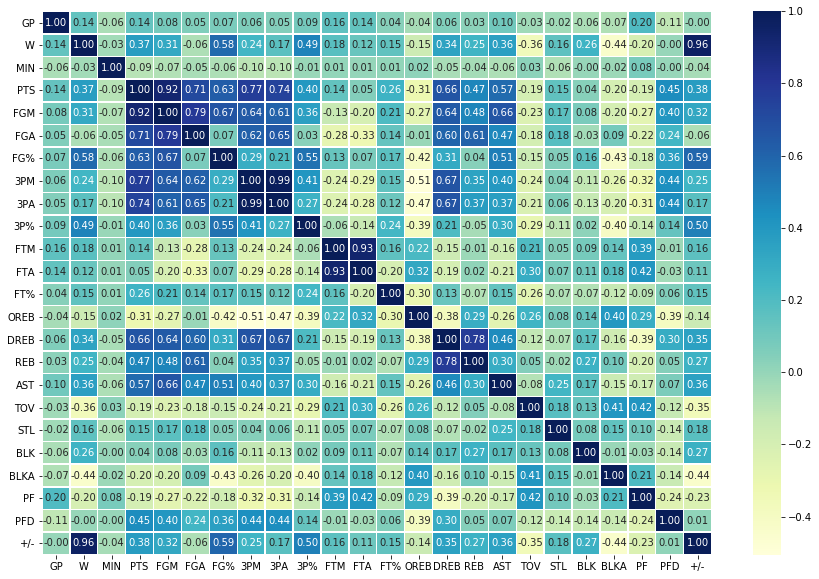

In [11]:
#using correlation matrix to find the features that increases the number of W
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

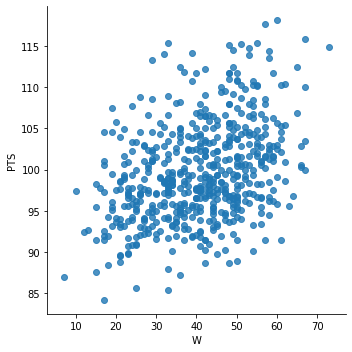

In [13]:
#comparing number of wins per pts per game
vis1 = sns.lmplot(data=df,x='W',y='PTS',fit_reg=False)

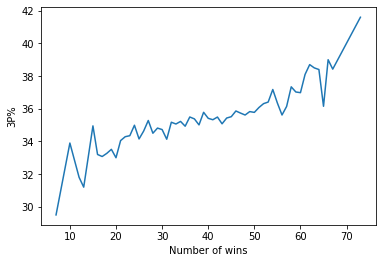

In [58]:
#comparing 3p% per number of wins
df.groupby(['W'])['3P%'].mean().plot()
plt.ylabel('3P%')
plt.xlabel('Number of wins')
plt.show()

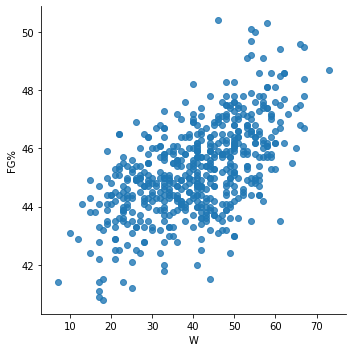

In [20]:
#comparing the FG% per number of wins

vis1 = sns.lmplot(data=df,x='W',y='FG%',fit_reg=False)

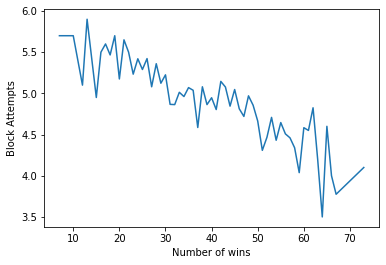

In [57]:
#comparing blocks attempts per number of wins
df.groupby(['W'])['BLKA'].mean().plot()
plt.ylabel('Block Attempts')
plt.xlabel('Number of wins')
plt.show()

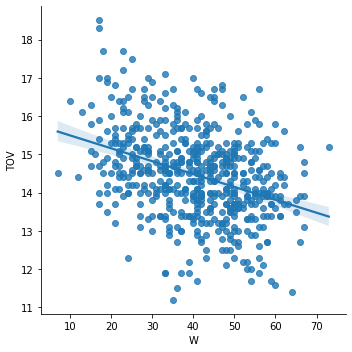

In [29]:
#comparing turnovers per number of wins

vis1 = sns.lmplot(data=df,x='W',y='TOV',fit_reg=True)

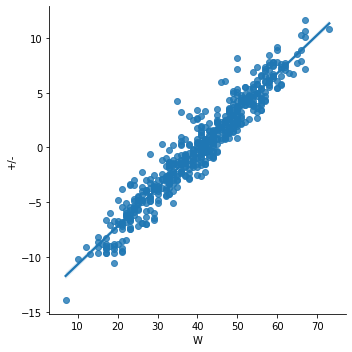

In [28]:
#comparing the plus minus per number of wins

vis1 = sns.lmplot(data=df,x='W',y='+/-',fit_reg=True)

In [59]:
X = df.drop(['W'],axis=1)
y = df['W']

In [60]:
#splitting the data in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


In [62]:
#using randomizedsearchcv to find the best parameters and fitting the data using random forest regressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf_grid = {"n_estimators": [300,900,1500], "max_depth": [None, 3, 6], "max_features": [0.5, 1, "auto"], "min_samples_split":[2, 5, 8], 'min_samples_leaf': [2, 6, 10]}
model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),param_distributions=rf_grid,n_iter=5,cv=5,verbose=True)
model.fit(X_train,y_train)
print(model.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   59.7s finished


{'n_estimators': 1500, 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': None}


In [63]:
#predicting results
y_pred = model.predict(X_test)

In [68]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score



In [66]:
#Evaluating the predictions using mean absolute error and r2score
mean_absolute_error(y_test, y_pred)

2.826731544287842

In [69]:
r2_score(y_test,y_pred)

0.910413261438365